In [25]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# import the data

X, y = load_breast_cancer(return_X_y = True, as_frame=True)

df = X
df['target'] = y

In [27]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [29]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [30]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


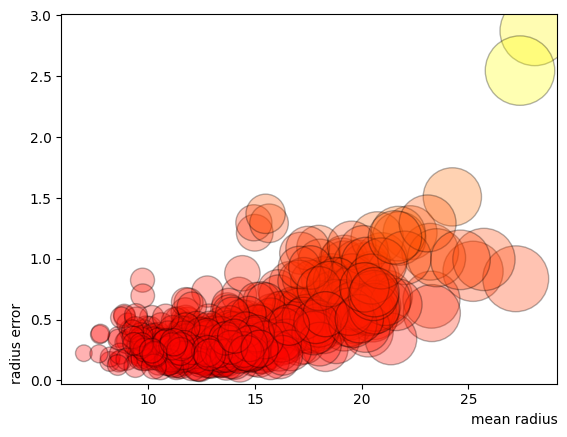

In [ ]:
# simple scatter plot on the "mean area" feature

plt.scatter(df['mean radius'], df['radius error'], s=df['mean area'], alpha=0.3, c=df['area error'], edgecolors='k', cmap='autumn')
plt.xlabel('mean radius', loc='right')
plt.ylabel('radius error', loc='bottom')
plt.show()

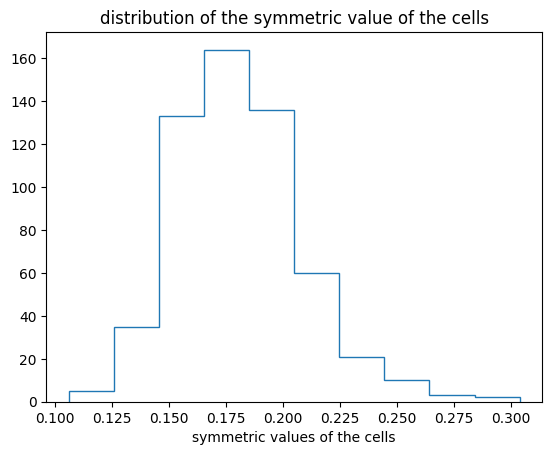

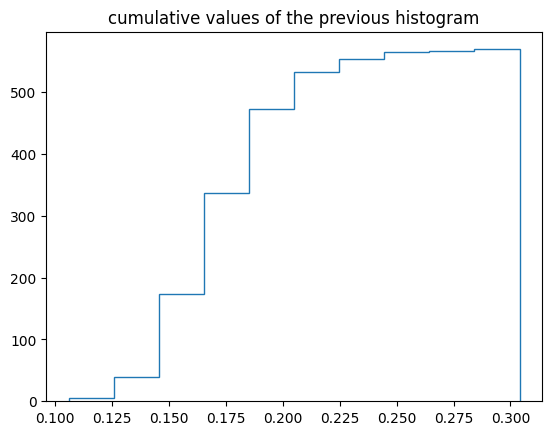

In [79]:
# histogram of the symmetry of the cancer cell
plt.hist(df['mean symmetry'], histtype='step')
plt.title("distribution of the symmetric value of the cells")
plt.xlabel('symmetric values of the cells')
plt.show()



plt.hist(df['mean symmetry'], histtype='step', cumulative=True)
plt.title('cumulative values of the previous histogram')
plt.show()

In [87]:
def add_features(df, column):
    column_cum_sum = f"cumulative {column}"
    df[column_cum_sum] = df[column].cumsum()

    column_cum_min = f"cumulative min {column}"
    df[column_cum_min] = df[column].cummin()

    column_cum_max = f"cumulative max {column}"
    df[column_cum_max] = df[column].cummax()

    return df

In [88]:
df_copy = df.copy()

for column in df_copy.columns[:10]:
    df_copy = add_features(df_copy, column)
df_copy.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,cumulative max mean concavity,cumulative mean concave points,cumulative min mean concave points,cumulative max mean concave points,cumulative mean symmetry,cumulative min mean symmetry,cumulative max mean symmetry,cumulative mean fractal dimension,cumulative min mean fractal dimension,cumulative max mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.3001,0.14710,0.14710,0.1471,0.2419,0.2419,0.2419,0.07871,0.07871,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.3001,0.21727,0.07017,0.1471,0.4231,0.1812,0.2419,0.13538,0.05667,0.07871
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.3001,0.34517,0.07017,0.1471,0.6300,0.1812,0.2419,0.19537,0.05667,0.07871
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.3001,0.45037,0.07017,0.1471,0.8897,0.1812,0.2597,0.29281,0.05667,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.3001,0.55467,0.07017,0.1471,1.0706,0.1809,0.2597,0.35164,0.05667,0.09744


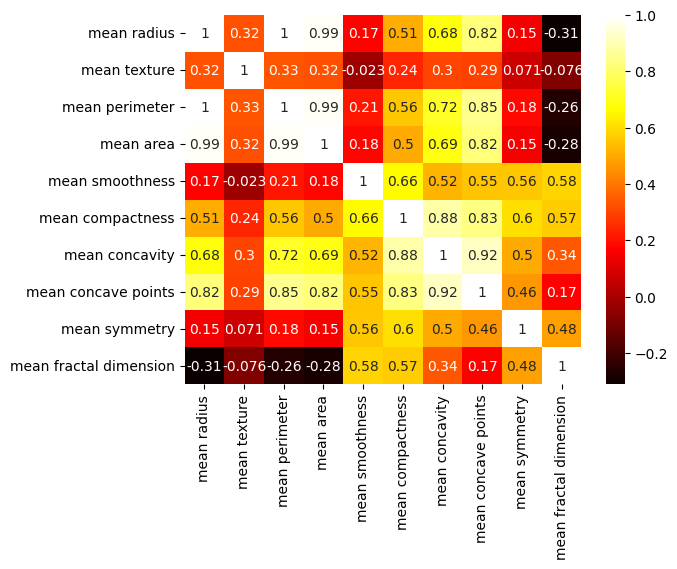

In [101]:
sns.heatmap(df_copy.iloc[:, 0:10].corr(), cmap='hot', annot=True)
plt.show()

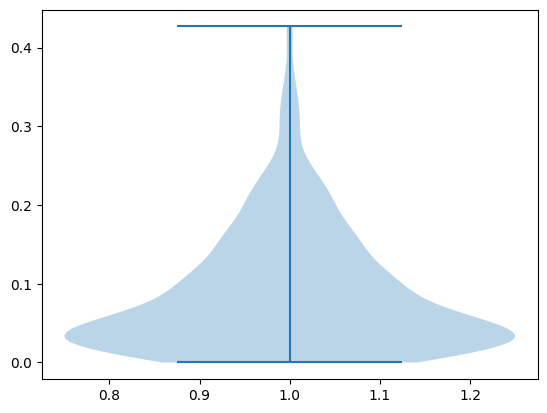

In [94]:
# concavity of the cells

plt.violinplot(df['mean concavity'])
plt.hot()
plt.show()

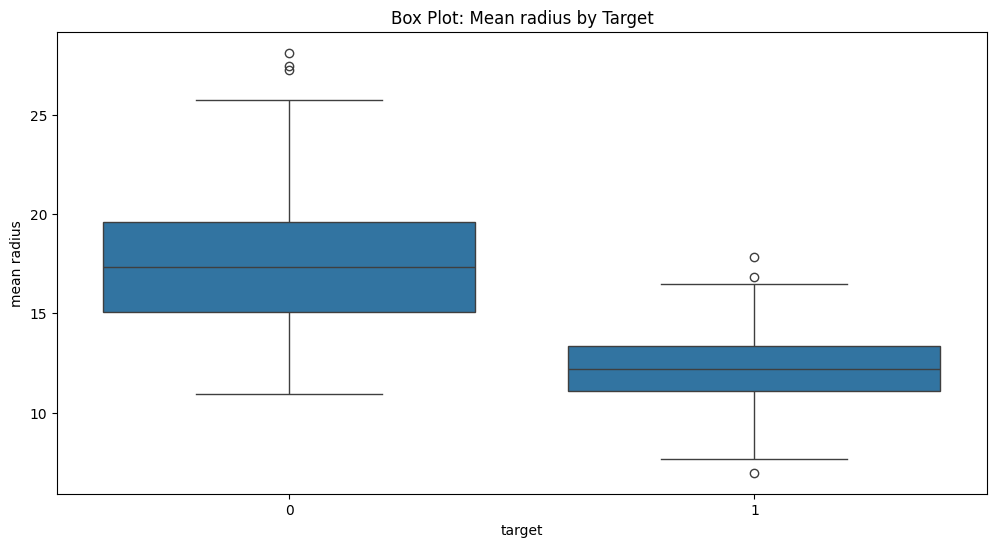

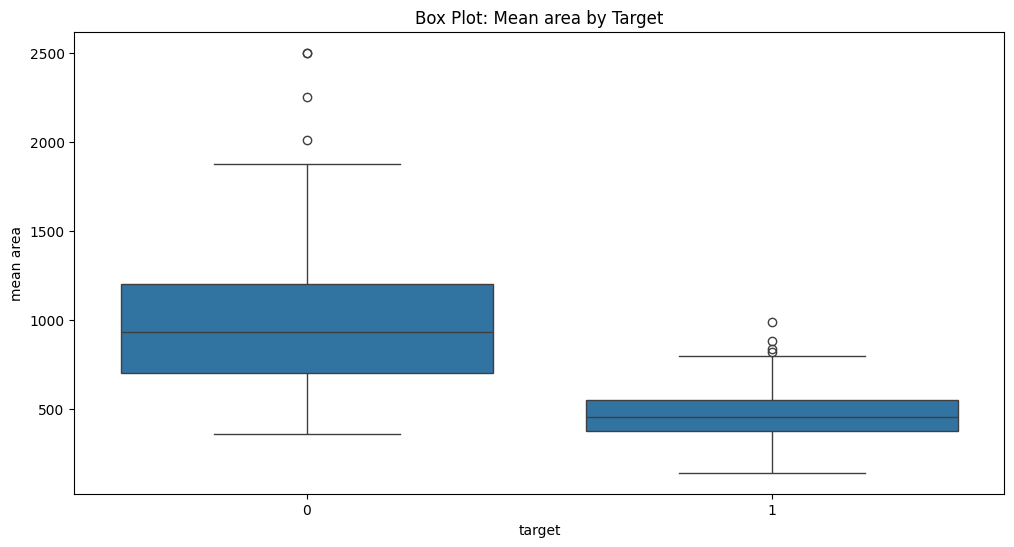

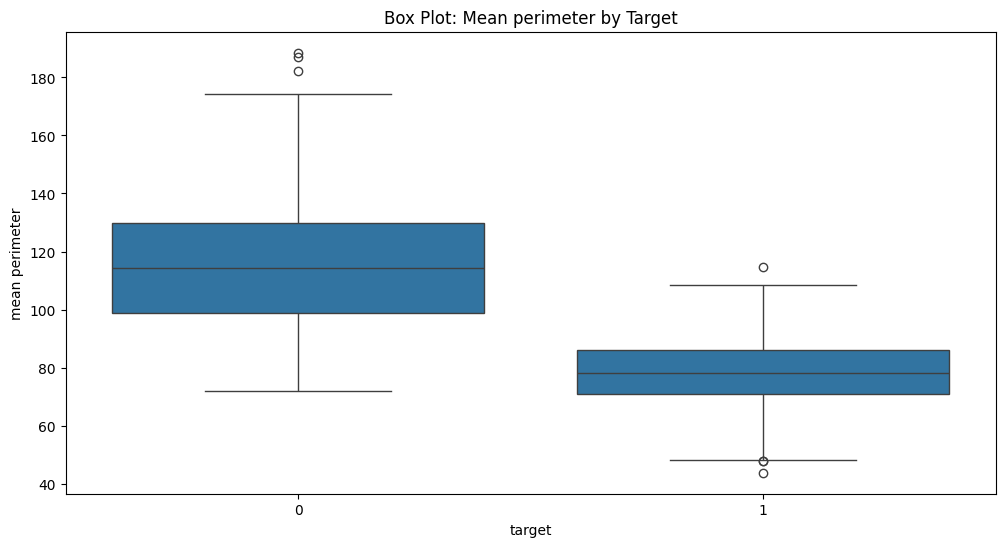

In [137]:
myList = ['mean radius', 'mean area', 'mean perimeter']

for column in myList:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='target', y=column, data=df)
    plt.title(f'Box Plot: {column.capitalize()} by Target')
    plt.show()

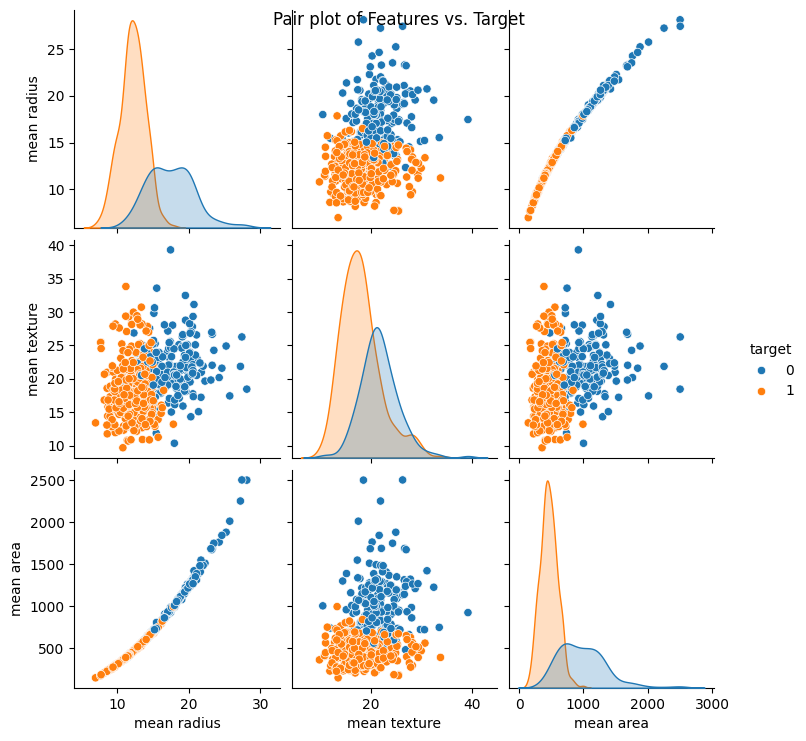

In [139]:
sns.pairplot(df[['mean radius', 'mean texture', 'mean area', 'target']], hue='target')
plt.suptitle("Pair plot of Features vs. Target")
plt.show()

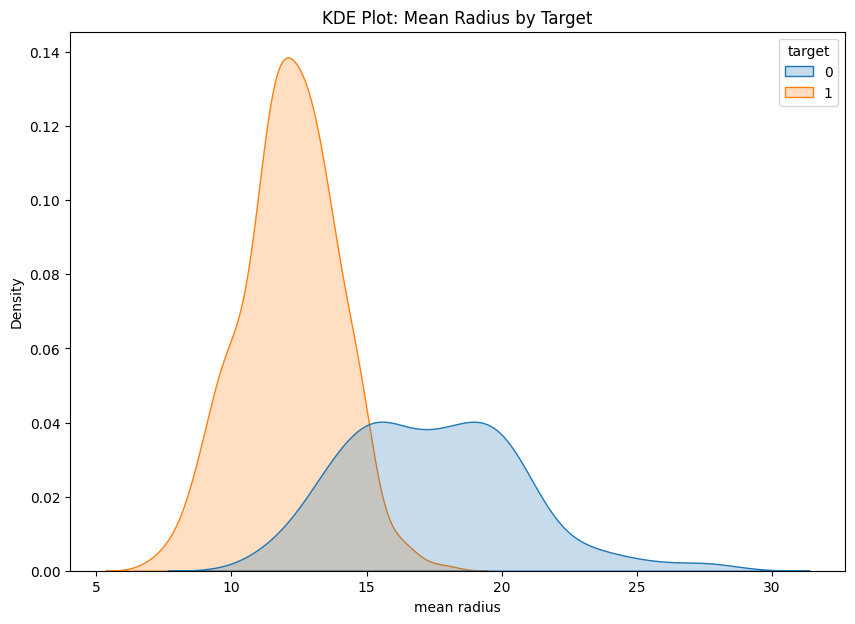

In [140]:
plt.figure(figsize=(10, 7))
sns.kdeplot(data=df, x='mean radius', hue='target', fill=True)
plt.title("KDE Plot: Mean Radius by Target")
plt.show()

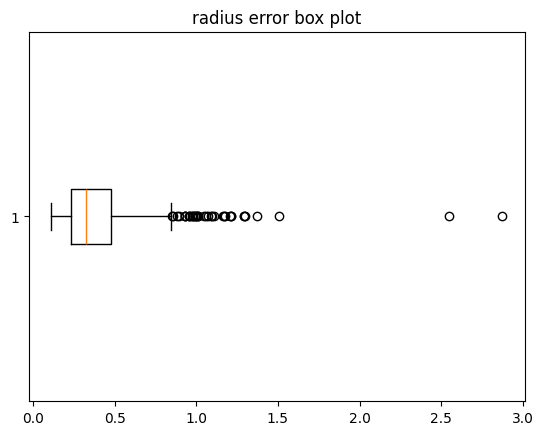

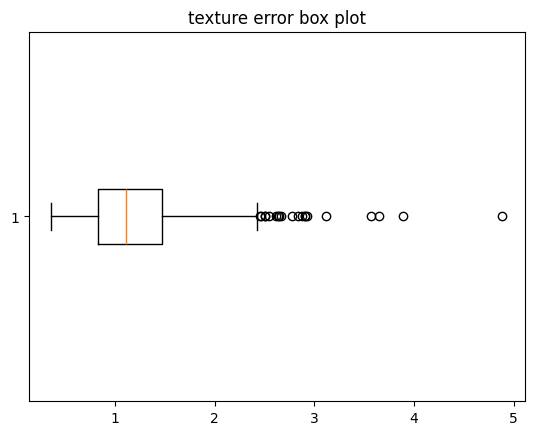

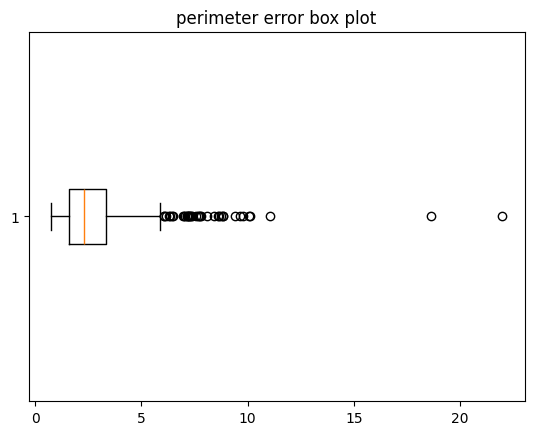

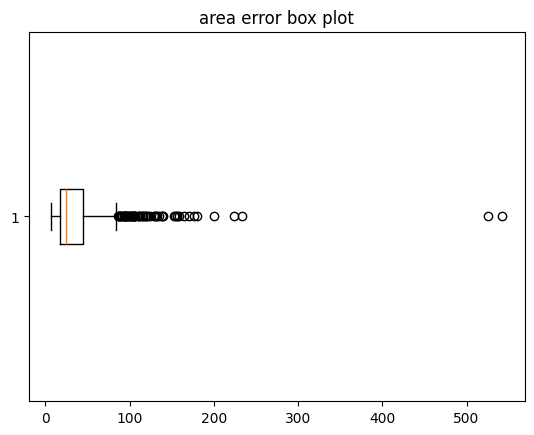

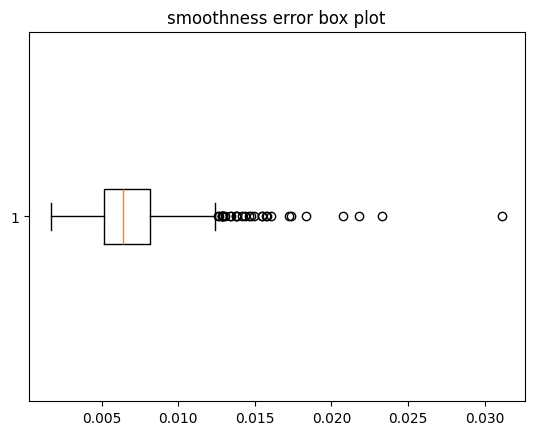

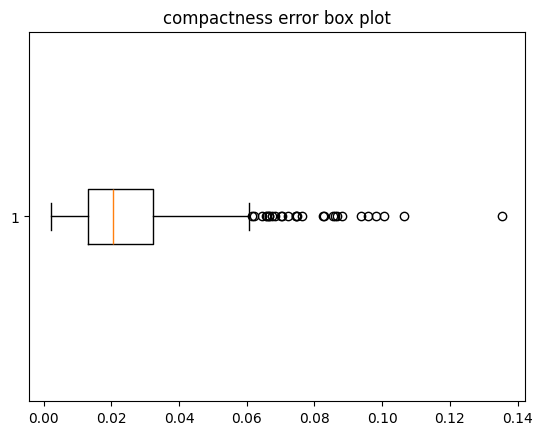

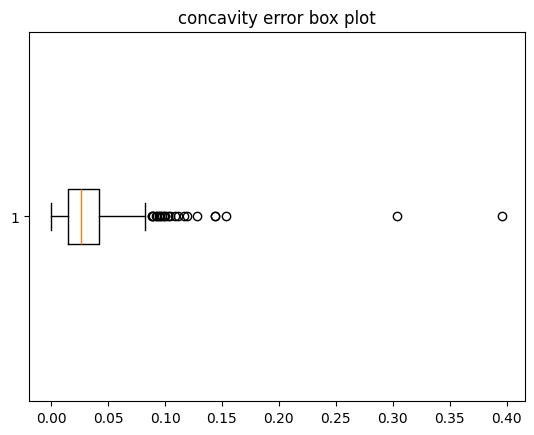

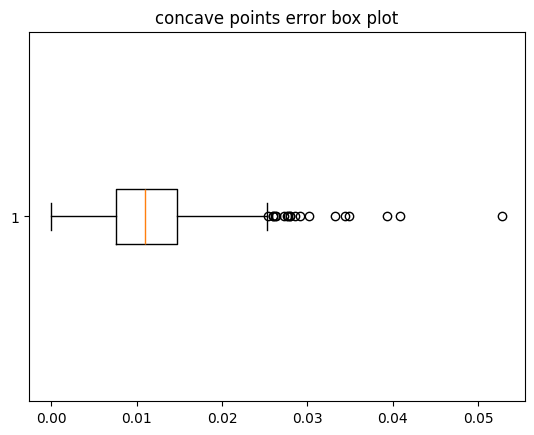

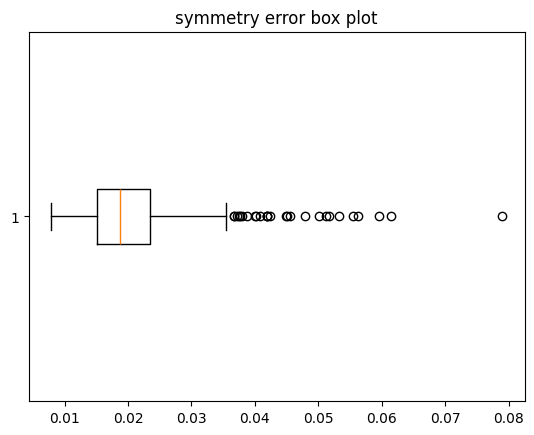

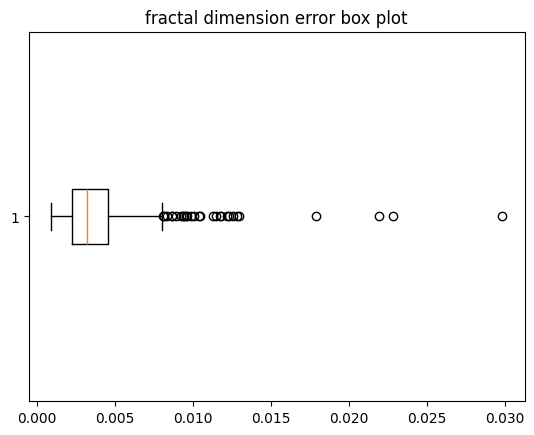

In [ ]:
for column in df.iloc[:, 10:20].columns:
    plt.boxplot(df[column], vert=False)
    plt.title(f"{column} box plot")
    plt.show()

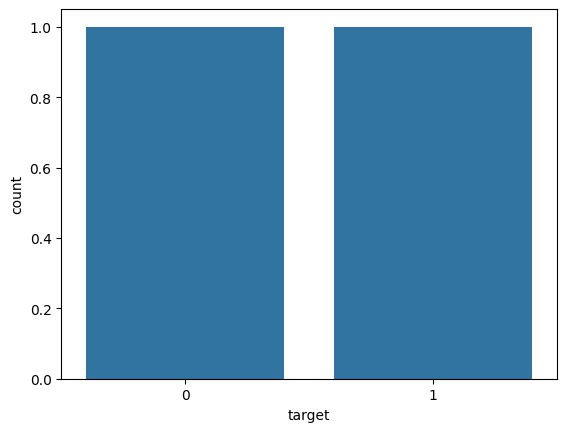

In [135]:
sns.countplot(df['target'].value_counts())
plt.show()


In [95]:
# building the models 

def train(models : list, trainData : tuple, testData : tuple):
    result = dict()
    for model in models:
        model.fit(trainData[0], trainData[1])

        predictions = model.predict(testData[0])
        model_name = type(model).__name__
        print(f"{model_name} model succesfully trained on the data and got the accuracy score: {accuracy_score(testData[1], predictions)}")
        print(f"the confustion matrix of {model_name} model is:\n{confusion_matrix(testData[1], predictions)}")
        print(f"and finally the classification report:\n{classification_report(testData[1], predictions)}")

        result[model_name] = accuracy_score(testData[1], predictions)
    
    best_result = -10e8
    best_model = None
    for model_name, accuracy in result.items():
        if accuracy > best_result:
            best_result = accuracy
            best_model = model_name
    
    print(f"the best model is {best_model} with the accuracy of {best_result}")


In [97]:
y = df['target']
X = df.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)



dt = DecisionTreeClassifier(criterion='gini')
lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=3)

models = [dt, lr, knn]

train(models, (X_train, y_train), (X_test, y_test))

DecisionTreeClassifier model succesfully trained on the data and got the accuracy score: 0.8859649122807017
the confustion matrix of DecisionTreeClassifier model is:
[[38  6]
 [ 7 63]]
and finally the classification report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        44
           1       0.91      0.90      0.91        70

    accuracy                           0.89       114
   macro avg       0.88      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114



c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression model succesfully trained on the data and got the accuracy score: 0.9122807017543859
the confustion matrix of LogisticRegression model is:
[[39  5]
 [ 5 65]]
and finally the classification report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        44
           1       0.93      0.93      0.93        70

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

KNeighborsClassifier model succesfully trained on the data and got the accuracy score: 0.9035087719298246
the confustion matrix of KNeighborsClassifier model is:
[[36  8]
 [ 3 67]]
and finally the classification report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        44
           1       0.89      0.96      0.92        70

    accuracy                           0.90       114
   macro avg       

0.9122807017543859

In [106]:
import joblib

joblib.dump(lr, 'best_model.pkl')
print('Model saved')

Model saved
